In [17]:
from visualstoryteller.getmorewords_sapacy import get_more_words
from visualstoryteller.getmorepics_twonouns import getmorepics_twonouns # one noun per content pic
from visualstoryteller.getonepic import getonepic # only one pic
from visualstoryteller.getmorepics import getmorepics # one noun per content pic

from visualstoryteller.content import ContentImg
from visualstoryteller.contentunsplash import ContentImgUnsplash
from visualstoryteller.style import StyleImg
from visualstoryteller.mixmorepics import GetStylePics

In [18]:
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

# Process whole documents
text = ("I went to the beach with my three stupid dogs")
doc = nlp(text)
#print([token for token in doc if token.pos_ == "NOUN"])
# Analyze syntax
#print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
#print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

In [8]:
all_stopwords = nlp.Defaults.stop_words
tokens_without_sw= [token for token in doc if token.pos_ == "NOUN" and token not in all_stopwords]

print(tokens_without_sw)

[beach, dogs]


## getmorepics_twonouns

In [11]:
text = 'ran after the three sad dogs under table, run, she eats, jump, scream, eat'
doc = nlp(text)

In [12]:
# have 2x as many verbs as nouns
#nouns, verbs = get_more_words(text, 14)
nouns = [token for token in doc if token.pos_ == "NOUN"]
verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
print(nouns)
print(verbs)

[dogs, table]
['run', 'run', 'eat', 'jump', 'scream', 'eat']


In [41]:
if len(nouns) % 2 == 1:
    nouns.append(nouns[-1])

content_link = []
content_author_name = []
# content_author_profile = []
style_link = []
style_author_name = []
style_author_profile = []

for i in range(len(nouns)//2):
    forcontent = nouns[2*i : 2*i+1]
    forstyle = verbs[4*i :4*i + 4]

    contentimage = ContentImg()
    # link, author_name, author_profile = contentimage.get_content(forcontent)
    link, author_name = contentimage.get_content(forcontent)
    content_link.append(link)
    content_author_name.append(author_name)
    # content_author_profile.append(author_profile)

    styleimage = ContentImgUnsplash()
    link, author_name, author_profile = styleimage.get_content(forstyle)
    style_link.append(link)
    style_author_name.append(author_name)
    # style_author_profile.append(author_profile)

mixing = GetStylePics()
mixing.load_images(content_link, style_link)
mixing.stylize()

# if show_all:
#     mixing.show_all_images()

# if show_originals:
#     mixing.show_originals()

# if show_result:
#     mixing.show_stylized_image()

toreturn = {
    'OK' : len(mixing.stylized_image),
    'image' : mixing.stylized_image,
    'content': [content_link, content_author_name], # content_author_profile],
    'style' : [style_link, style_author_name, style_author_profile]
}

ValueError: empty range for randrange() (0, 0, 0)

In [34]:
len(mixing.stylized_image)

2

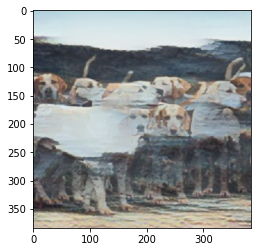

In [32]:
import matplotlib.pyplot as plt
plt.imshow(mixing.stylized_image[0][0])

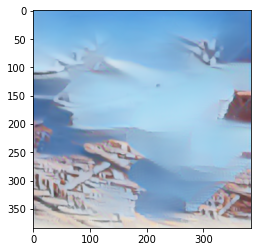

In [33]:
plt.imshow(mixing.stylized_image[1][0])

## getmorepics
only one noun per content image

In [20]:
text = 'A frog cooked to death slowly.'

In [16]:
text = 'A red frog cooked to blue death slowly.'

In [26]:
text = 'A frog would not realize a gradual change of water temperature if it was put in the cold water and the water is heated up slowly. It would die.'

In [39]:
import spacy
nlp = spacy.load("en_core_web_sm")
import random
# text = "Let's go to the beach if it's a bit warmer. I like cake and coffee so much, and I'm happy that this bootcamp is over. this demo day sucks"
doc = nlp(text.lower())

def noun_adj(adj,verb):
    if len(adj) > 0:
        return adj[random.randint(0, len(adj)-1)]
    elif len(verb) > 0:
        return verb[random.randint(0, len(verb)-1)]
    else:
        return 'love'

nouns_adjectives = []
verbs = [str(token.lemma_) for token in doc if token.pos_ == "VERB"]
chunks = [x.text for x in doc.noun_chunks]
for ch in chunks:
    chd = nlp(ch)
    nouns = [str(token) for token in chd if token.pos_ == "NOUN"]
    if len(nouns):
        adjectives = [str(token) for token in chd if token.pos_ == "ADJ"]
        for n in nouns:
            noun = n
            adj = noun_adj(adjectives, verbs)
            nouns_adjectives.append([noun, adj])
            
# max_number = 6
# while len(nouns_adjectives)>max_number:
#     del nouns_adjectives[random.randint(1,len(nouns_adjectives)-2)]
    
nouns_adjectives

[['frog', 'put'],
 ['change', 'gradual'],
 ['water', 'heat'],
 ['temperature', 'put'],
 ['water', 'cold'],
 ['water', 'heat']]

In [58]:
text = 'A good friend sent her a link to ugly clown coins'
doc = nlp(text)
nouns = [str(token) for token in doc if token.pos_ == "NOUN"]
verbs = [str(token.lemma_) for token in doc if token.pos_ == "VERB"]

In [61]:
adjectives = [str(token) for token in doc if token.pos_ == "ADJ"]

In [69]:
print(nouns)
print(verbs)
print(adjectives)

['friend', 'link', 'coins']
['send', 'clown', 'good', 'ugly']
['good', 'ugly']


In [64]:
verbs = verbs + adjectives

In [15]:
from visualstoryteller.style import StyleImg

In [27]:
import random

In [65]:
content_link = []
content_author_name = []
# content_author_profile = []

style_link = []
style_author_name = []
style_author_profile = []

for i in range(len(nouns)):
    forcontent = [nouns[i]]
    n = random.randint(0, len(verbs)-1)
    forstyle = [verbs[n]]

    contentimage = ContentImg()
    # link, author_name, author_profile = contentimage.get_content(forcontent)
    link, author_name = contentimage.get_content(forcontent)
    content_link.append(link)
    content_author_name.append(author_name)
    # content_author_profile.append(author_profile)

    styleimage = ContentImgUnsplash()
    link, author_name, author_profile = styleimage.get_content(forstyle)
    style_link.append(link)
    style_author_name.append(author_name)
    style_author_profile.append(author_profile)

mixing = GetStylePics()
mixing.load_images(content_link, style_link)
mixing.stylize()

# if show_all:
#     mixing.show_all_images()

# if show_originals:
#     mixing.show_originals()

# if show_result:
#     mixing.show_stylized_image()

toreturn = {
    'OK': len(mixing.stylized_image),
    'image': mixing.stylized_image,
    'content': [content_link, content_author_name], # content_author_profile],
    'style': [style_link, style_author_name, style_author_profile]
}

16384/13158 [=====================================] - 0s 0us/step


In [53]:
len(mixing.stylized_image)

3

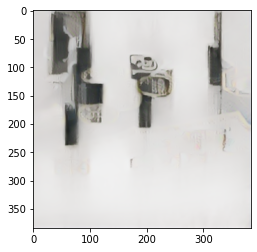

In [68]:
import matplotlib.pyplot as plt
plt.imshow(mixing.stylized_image[2][0])

## getonepic

In [25]:
text = 'A frog would not realize a gradual change of water temperature if it was put in the cold water and the water is heated up slowly. It would die.'

In [ ]:
nouns, verbs = get_more_words(text)
print(nouns)
print(verbs)

In [ ]:
contentimage = ContentImg()
# content_link, content_author_name, content_author_profile \
#     = contentimage.get_content(nouns)
content_link, content_author_name = contentimage.get_content(nouns)

styleimage = ContentImgUnsplash()
style_link, style_author_name, style_author_profile \
    = styleimage.get_content(verbs)

mixing = ImageStyle()
mixing.load_images(content_link, style_link)
mixing.stylize()

if show_all:
    mixing.show_all_images()

if show_originals:
    mixing.show_originals()

if show_result:
    mixing.show_stylized_image()

toreturn = {
    'OK' : 1,
    'image': mixing.stylized_image,
    #'imagelist' : list(img_to_array(mixing.stylized_image)),
    'content': [content_link, content_author_name], # content_author_profile],
    'style': [style_link, style_author_name, style_author_profile]
}

if saveimage:
    mixing.save_jpgs(savename)
    toreturn['saved'] = f"../api/{savename}"


In [11]:
from visualstoryteller.getmorewords import get_more_words
get_more_words(text)

[['death', 'cook']]

In [31]:
from visualstoryteller.getmorepics import getmorepics
import matplotlib.pyplot as plt
text = 'A frog would not realize a gradual change of water temperature if it was put in the cold water and the water is heated up slowly. It would die.'
rr = getmorepics(text)

16384/13594 [====================================] - 0s 1us/step


In [32]:
len(rr['image'])

6

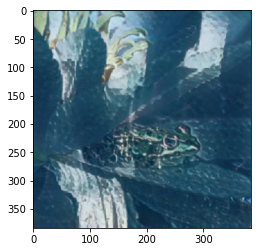

In [33]:
plt.imshow(rr['image'][0][0])

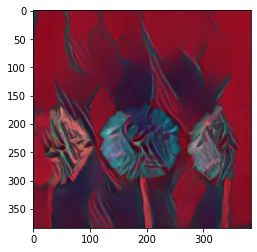

In [34]:
plt.imshow(rr['image'][1][0])

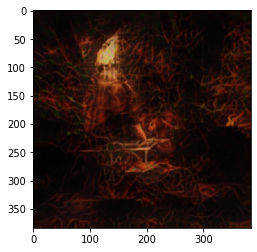

In [35]:
plt.imshow(rr['image'][2][0])

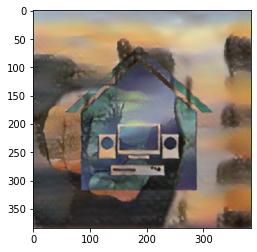

In [36]:
plt.imshow(rr['image'][3][0])


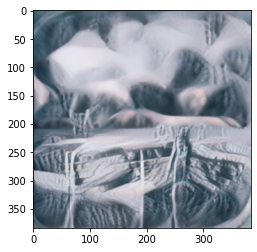

In [37]:
plt.imshow(rr['image'][4][0])


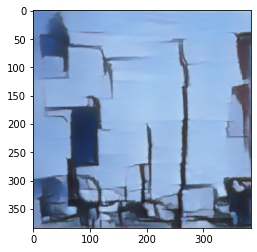

In [38]:
plt.imshow(rr['image'][5][0])

IndexError: list index out of range